Criador da base de dados: Aruã Viggiano Souza

Link da base de dados no Kaggle: https://www.kaggle.com/datasets/arusouza/daily-eletricity-generation-by-source-on-brazil

Os dados foram extraídos do site oficial da ONS.
A unidade para a quantidade de eletricidade gerada é GWh (Giga Watt-hora). Os dados vão de 01-01-2000 até 31-12-2022, com observações diárias.


In [ ]:
#Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

#Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#Lib para ignorar avisos
import warnings

#Lib para transformar dados em números
from sklearn.preprocessing import LabelEncoder

#Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
#Realizando a leitura da base de dados
base_dados = pd.read_csv('daily_eletricity_generation_by_source_brazil.csv')

In [ ]:
#Verificando a leitura da base de dados
base_dados

,date,wind,hydroeletric,nuclear,solar,thermal
0,2000-01-01,NaN,687.10,11.53,NaN,47.72
1,2000-01-02,NaN,703.22,11.50,NaN,50.09
2,2000-01-03,NaN,847.51,11.52,NaN,51.93
3,2000-01-04,NaN,885.32,13.70,NaN,52.33
4,2000-01-05,NaN,909.19,13.80,NaN,48.45
...,...,...,...,...,...,...
8396,2022-12-27,284.16,1156.40,48.25,42.53,92.72
8397,2022-12-28,304.56,1132.33,48.33,51.91,93.09
8398,2022-12-29,255.32,1164.03,48.35,48.66,91.34
8399,2022-12-30,312.84,1074.12,48.32,48.21,94.82


In [ ]:
#Verificando a dimensão da base de dados
base_dados.shape

(8401, 6)

In [ ]:
#Verificando os tipos dos dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          8401 non-null   object 
 1   wind          6111 non-null   float64
 2   hydroeletric  8389 non-null   float64
 3   nuclear       8389 non-null   float64
 4   solar         2732 non-null   float64
 5   thermal       8401 non-null   float64
dtypes: float64(5), object(1)
memory usage: 393.9+ KB


In [ ]:
#Verifica a existência de valores nulos
base_dados.isnull().sum()

,0
date,0
wind,2290
hydroeletric,12
nuclear,12
solar,5669
thermal,0


In [ ]:
#Transformando valores nulos em 0
base_dados = base_dados.fillna(0)

In [ ]:
#Transformando date em uma data
base_dados['date'] = pd.to_datetime(base_dados['date'])

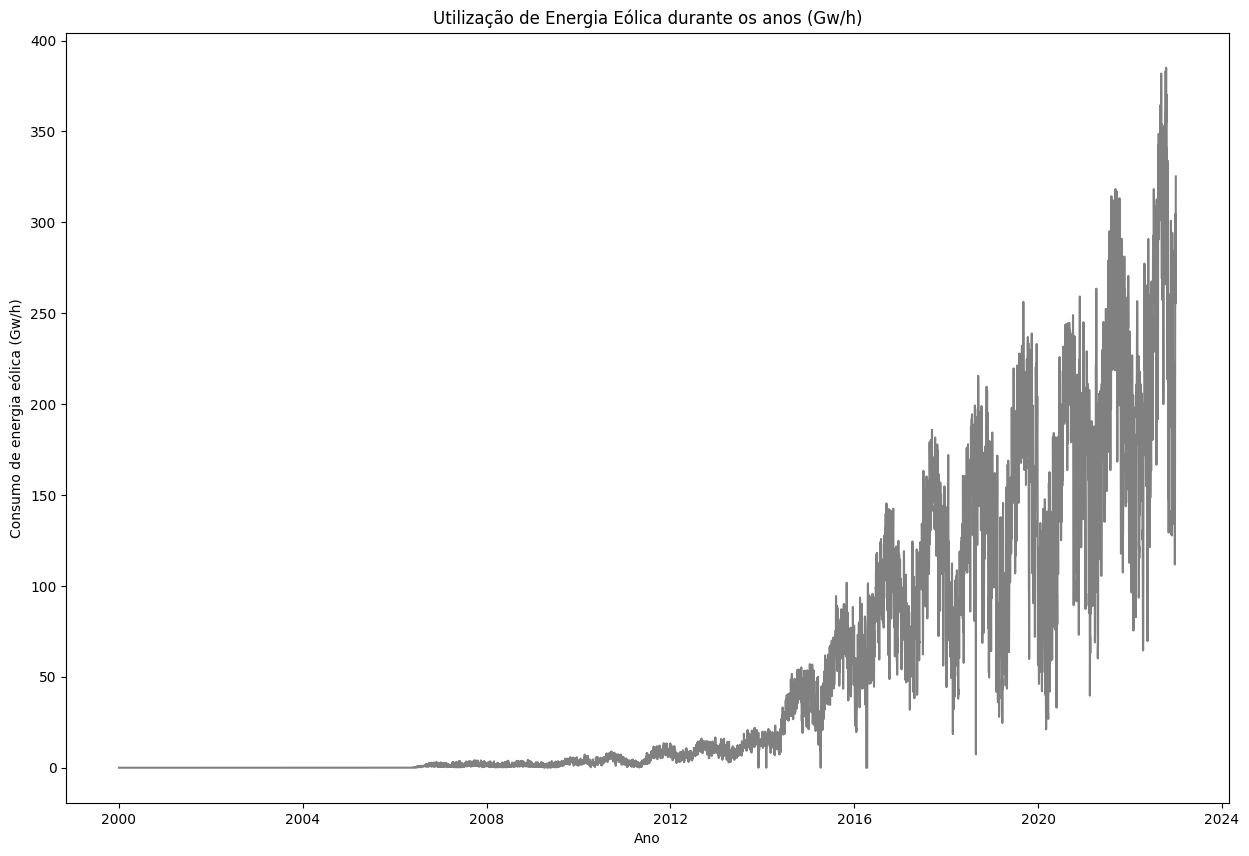

In [ ]:
#Plotando um gráfico que mostre a utilização de energia eólica durante os anos

plt.figure(figsize=(15,10)) #Mudando o tamanho da figura
plt.title('Utilização de Energia Eólica durante os anos (Gw/h)') #Definindo o título da figura
plt.xlabel('Ano') #Mudando o nome do eixo X
plt.ylabel('Consumo de energia eólica (Gw/h)') #Mudando o nome do eixo Y
plt.plot(base_dados['date'], base_dados['wind'], color= 'gray'); #Plotando o gráfico

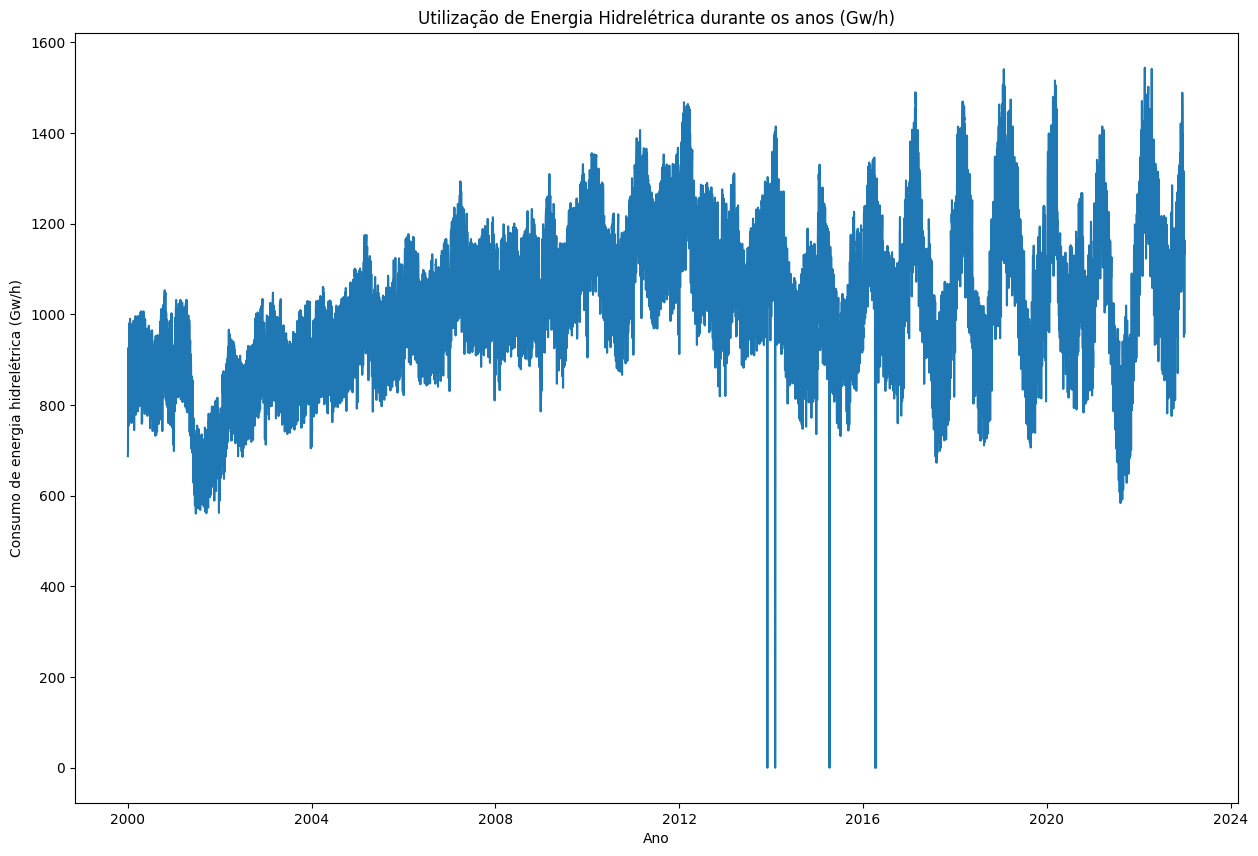

In [ ]:
#Plotando um gráfico que mostre a utilização de energia hidrelétrica durante os anos

plt.figure(figsize=(15,10)) #Mudando o tamanho da figura
plt.title('Utilização de Energia Hidrelétrica durante os anos (Gw/h)') #Definindo o título da figura
plt.xlabel('Ano') #Mudando o nome do eixo X
plt.ylabel('Consumo de energia hidrelétrica (Gw/h)') #Mudando o nome do eixo Y
plt.plot(base_dados['date'], base_dados['hydroeletric']); #Plotando o gráfico

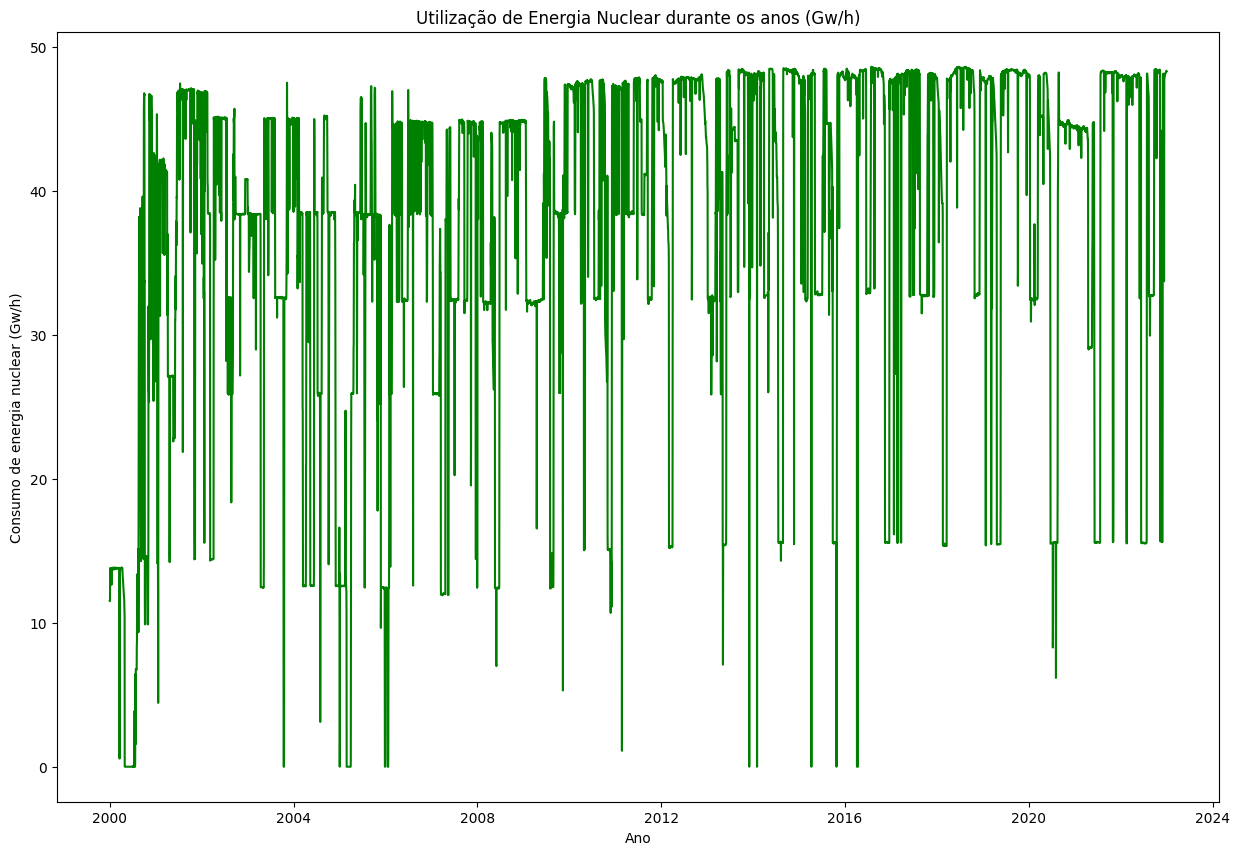

In [ ]:
#Plotando um gráfico que mostre a utilização de energia nuclear durante os anos

plt.figure(figsize=(15,10)) #Mudando o tamanho da figura
plt.title('Utilização de Energia Nuclear durante os anos (Gw/h)') #Definindo o título da figura
plt.xlabel('Ano') #Mudando o nome do eixo X
plt.ylabel('Consumo de energia nuclear (Gw/h)') #Mudando o nome do eixo Y
plt.plot(base_dados['date'], base_dados['nuclear'], color= 'green'); #Plotando o gráfico

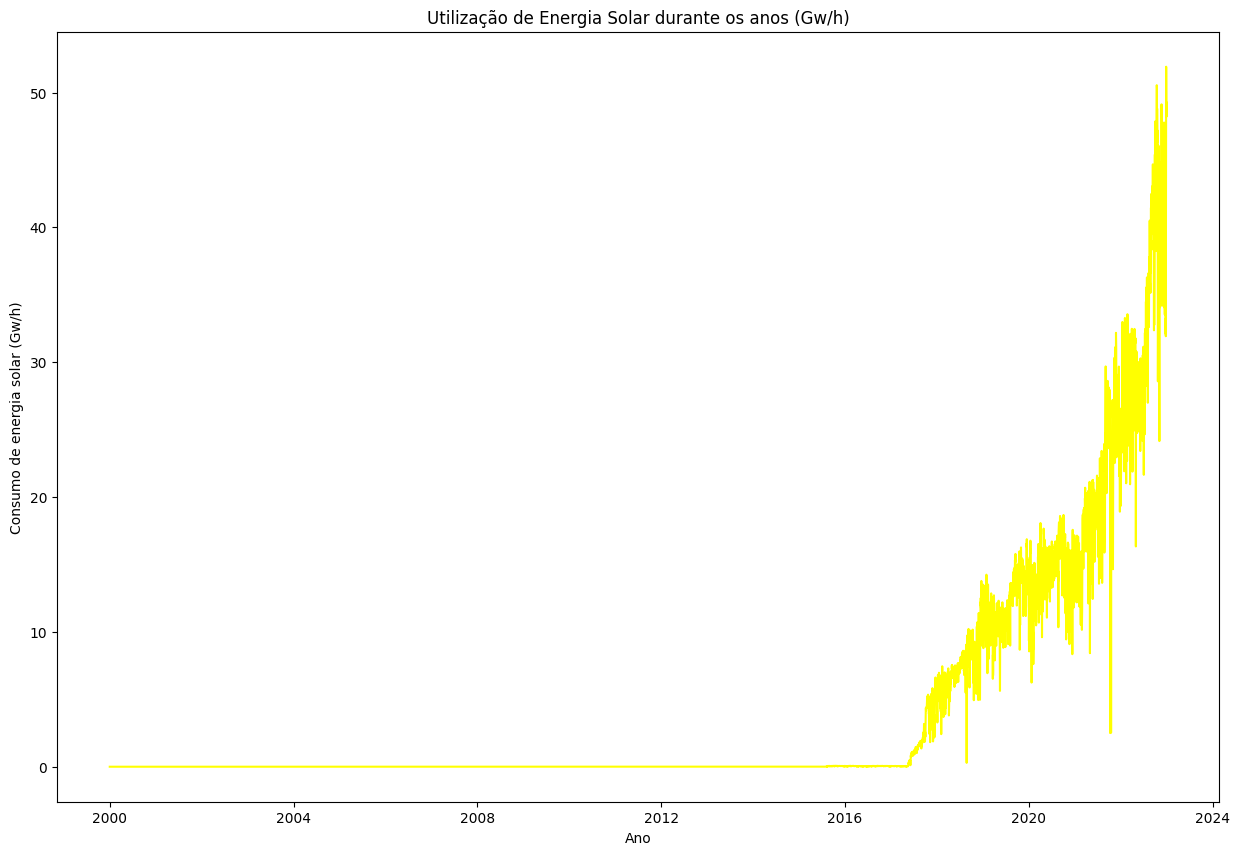

In [ ]:
#Plotando um gráfico que mostre a utilização de energia solar durante os anos

plt.figure(figsize=(15,10)) #Mudando o tamanho da figura
plt.title('Utilização de Energia Solar durante os anos (Gw/h)') #Definindo o título da figura
plt.xlabel('Ano') #Mudando o nome do eixo X
plt.ylabel('Consumo de energia solar (Gw/h)') #Mudando o nome do eixo Y
plt.plot(base_dados['date'], base_dados['solar'], color= 'yellow'); #Plotando o gráfico

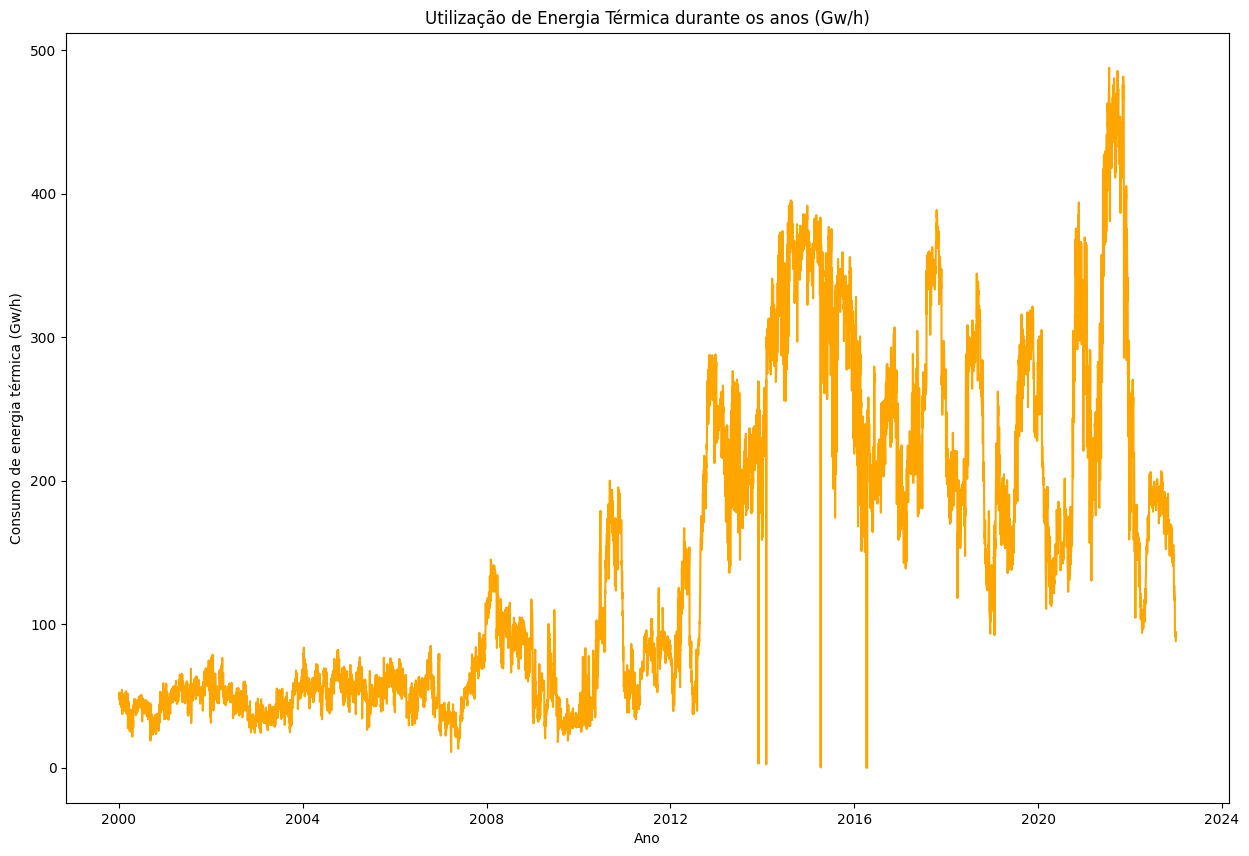

In [ ]:
#Plotando um gráfico que mostre a utilização de energia térmica durante os anos

plt.figure(figsize=(15,10)) #Mudando o tamanho da figura
plt.title('Utilização de Energia Térmica durante os anos (Gw/h)') #Definindo o título da figura
plt.xlabel('Ano') #Mudando o nome do eixo X
plt.ylabel('Consumo de energia térmica (Gw/h)') #Mudando o nome do eixo Y
plt.plot(base_dados['date'], base_dados['thermal'], color= 'orange'); #Plotando o gráfico

In [ ]:
#Verificando e comparando o consumo total de cada tipo de energia ao longo dos anos

base_dados_soma = base_dados[['wind', 'hydroeletric', 'nuclear', 'solar', 'thermal']].sum()
base_dados_soma

,0
wind,419443.48
hydroeletric,8918314.05
nuclear,319117.93
solar,32253.41
thermal,1245901.70


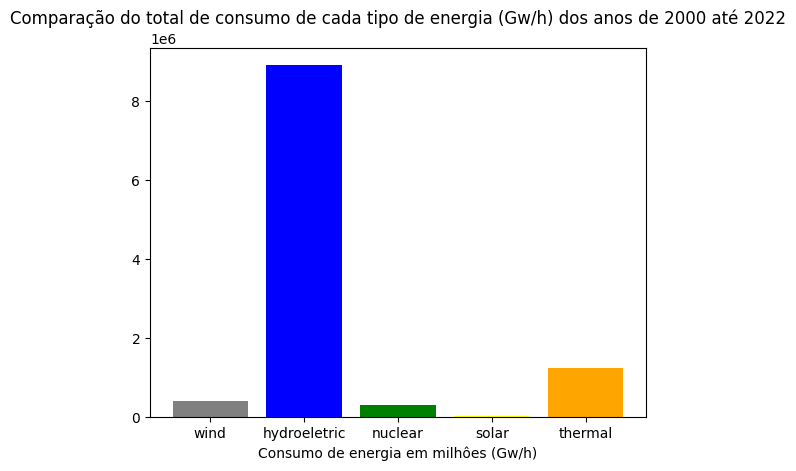

In [ ]:
#Plotando o gráfico

plt.title('Comparação do total de consumo de cada tipo de energia (Gw/h) dos anos de 2000 até 2022') #Definindo o título
plt.xlabel('Tipo de energia') #Definindo o nome do eixo x
plt.xlabel('Consumo de energia em milhôes (Gw/h)') #Definindo o nome do eixo y
plt.bar(base_dados_soma.index, base_dados_soma, color=['gray', 'blue', 'green', 'yellow', 'orange']); #Definindo o eixo x como o índice do dataframe e o y como seus valores